In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import SGDRegressor
import warnings
import scipy as sp
import scipy.optimize
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import make_classification
warnings.filterwarnings("ignore")

In [37]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    return (points[:,0], points[:,1])

# Task-A: What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

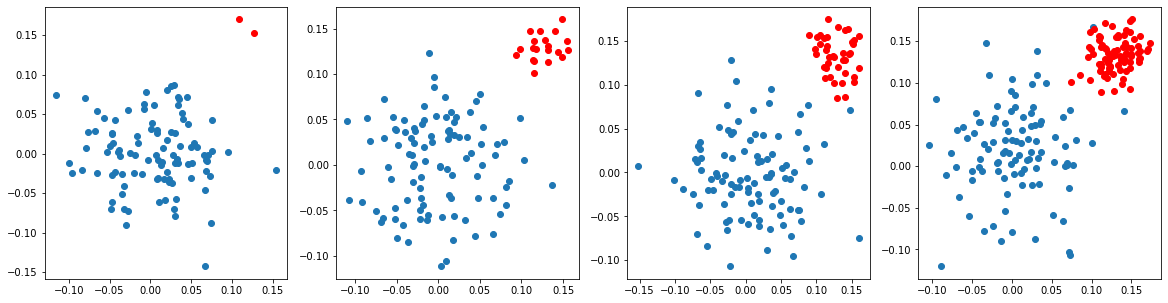

In [38]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

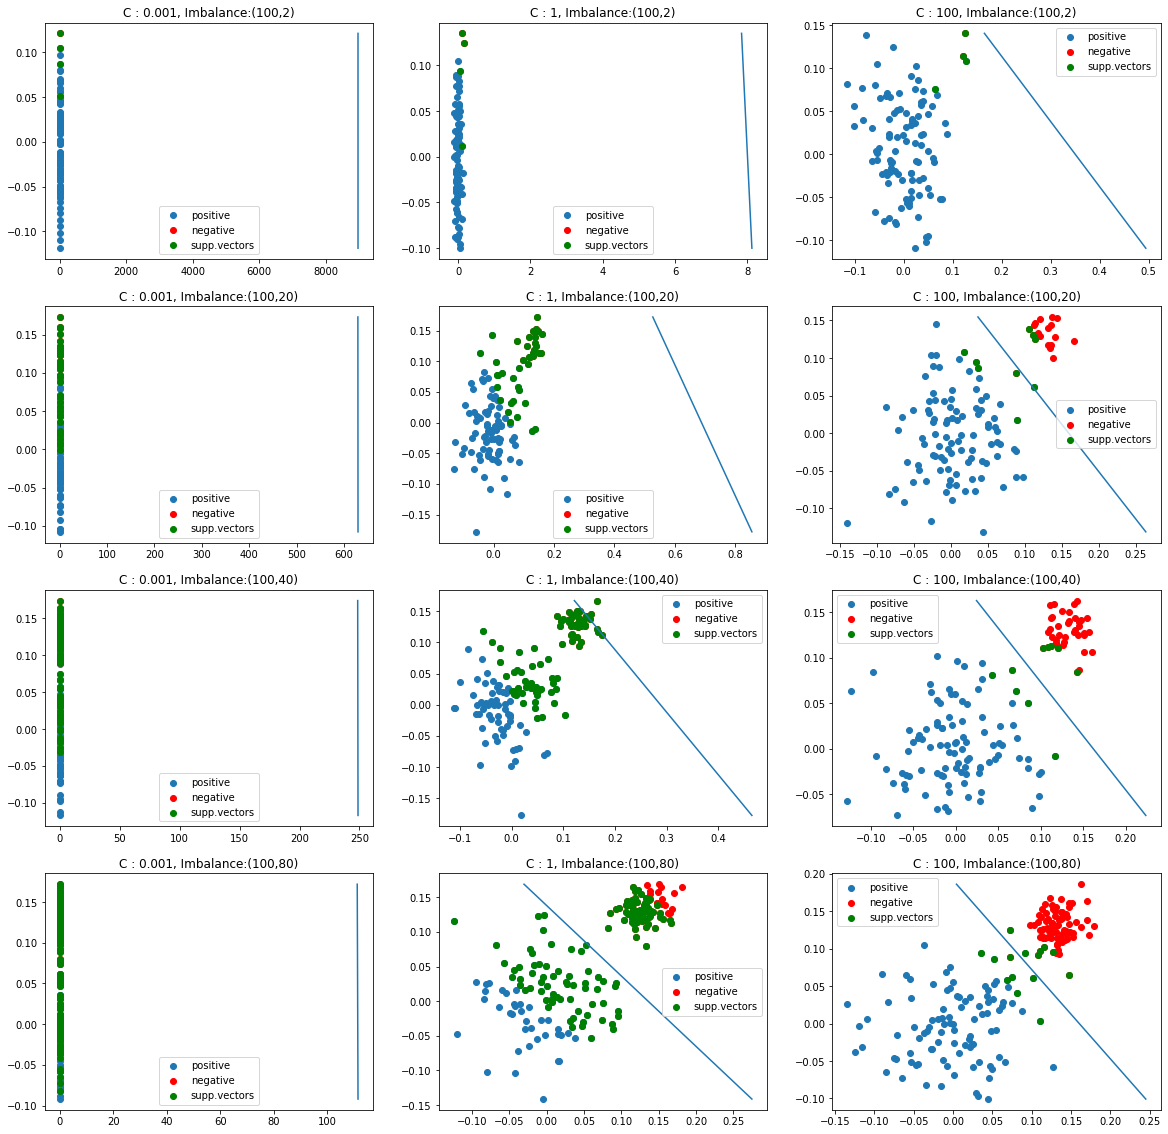

In [39]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
reg_strength = [0.001, 1, 100]
fig, axs = plt.subplots(4, 3, figsize=(20,20))
for j,i in enumerate(ratios):
    for iteration in range(len(reg_strength)):
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        axs[j, iteration].scatter(X_p[:,0],X_p[:,1],label ='positive')
        axs[j, iteration].scatter(X_n[:,0],X_n[:,1],color='red',label = 'negative')
        clf = SVC(C=reg_strength[iteration], kernel='linear')
        clf.fit(X,y)
        coef = clf.coef_[0]
        intercept = clf.intercept_
        min = np.min(X[:,1])
        max = np.max(X[:,1])
        svs = clf.support_vectors_
        x_values , y_values = draw_line(coef, intercept, min, max)
        axs[j, iteration].scatter(svs[:,0],svs[:,1],color='green',label = 'supp.vectors')
        axs[j, iteration].legend(fontsize=10)
        axs[j, iteration].plot(x_values, y_values)
        axs[j, iteration].title.set_text(f'C : {reg_strength[iteration]}, Imbalance:({i[0]},{i[1]})')



## observations 

* If C is very low (0.001),we are underfitting,because we are more preference to maximizing the margin and we are not caring about the misclassfied instances, since we are not caring about the misclassfied points, eventually we are not caring about our data point at all, all that the svm with C=0.001 is trying to do is find a plane with maximum margin,Hence from the graph also we can see that our Hyperplane predicts every point to be negative point due to underfitting. prior to Imbalancity into consdieration,It is C which is making our model a highly biased model

* If C is 1,we are just trying to minimize misclassifications as well as maximize the margin to the same extent.Both minimizing errors and maximum margin are treated equally.Hence with very few positive points(2 in 100) or (20 in 100),we tend to find hyperplane which is biased towards the majority class,because, its okay for the model to misclassify minority points than majority points because it has to consider both margin and errors with same weightage since c is 1

* If C is 100, we are giving more preference to reduce the errors than maximizing the margin, hence we can see that for almost balanced (80 in 100 points), the margin is less,but the points are almost correctly classified.
for Imbalanced dataset (2 in 100) or (20 in 100),the model is still biased towards majority class,since it has to take care of margin to a less extent also.

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

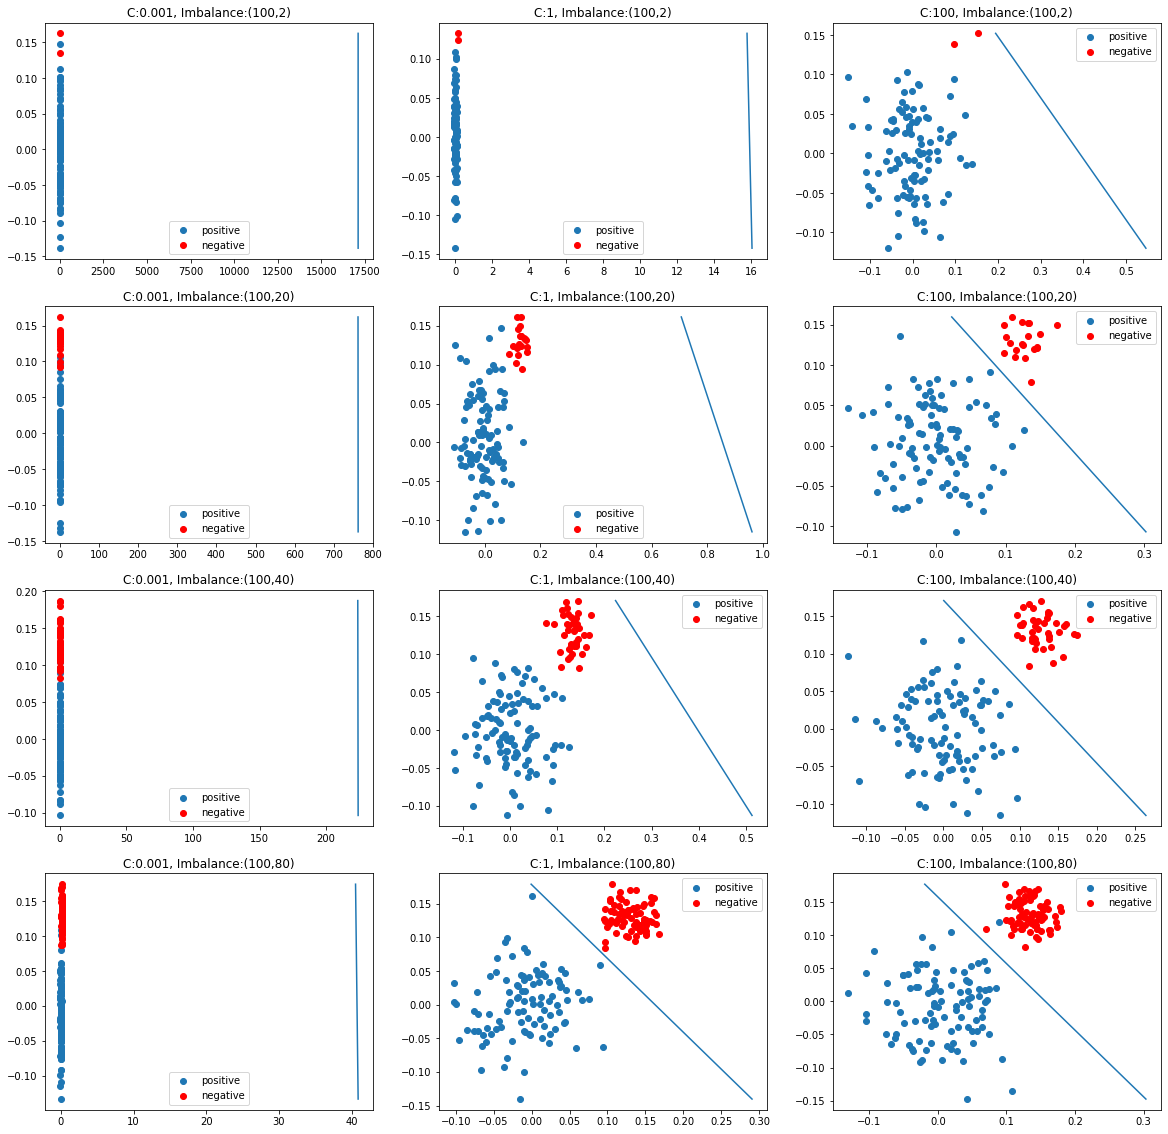

In [40]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
reg_strength = [0.001, 1, 100]
fig, axs = plt.subplots(4, 3, figsize=(20,20))
for j,i in enumerate(ratios):
    for iteration in range(len(reg_strength)):
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        axs[j, iteration].scatter(X_p[:,0],X_p[:,1],label ='positive')
        axs[j, iteration].scatter(X_n[:,0],X_n[:,1],color='red',label = 'negative')
        clf = LogisticRegression(C=reg_strength[iteration])
        clf.fit(X,y)
        coef = clf.coef_[0]
        intercept = clf.intercept_
        min = np.min(X[:,1])
        max = np.max(X[:,1])
        x_values , y_values = draw_line(coef, intercept, min, max)
        axs[j, iteration].legend(fontsize=10)
        axs[j, iteration].plot(x_values, y_values)
        axs[j, iteration].title.set_text(f'C:{reg_strength[iteration]}, Imbalance:({i[0]},{i[1]})')

## observations

* If C is very low (0.001), that suggests that lambda which is inverse of regularization strength is very high (1000),hence we are giving more prefernce to regularize the weights and we hardly care about reducing the logistic-loss,Hence we are underfitting,which is easily seen in the above graph with c = 0.001 for all diffrent datasets.

* If C is 1 ,we give equal preference to reducing the logistic loss and reguralizing the weights, hence it does impact when there is Imbalance in dataset,since having logistic loss for only minority class is ok when we have to care about regularizing the weights too.

* If C is 100, lambda is 0.01, which suggests that we are giving less prefernce to regularization and more prefernce to reducing the errors, hence we can see that training error is low when C is 100.

#Task-B: What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
data = pd.read_csv('/content/drive/MyDrive/AAIC_datasets/linear_models/task_b.csv')
data = data.iloc[:,1:]

In [43]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [44]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

* y is highly correlated with f3

In [45]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

* f2 is has high std,hence it has high variance

In [46]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


## Feature Importances before Normalization

### LR

In [47]:
clf = SGDClassifier(loss='log',random_state=42)
clf.fit(X,Y)
coef_ = np.abs(clf.coef_[0])
print("Feature Importances are:")
for index,item in enumerate(list(coef_)):
    print(f'f{index+1} :  {item} ')


Feature Importances are:
f1 :  8252.61712639443 
f2 :  9979.999399845816 
f3 :  10367.642231334077 


### SVM

In [48]:
clf = SGDClassifier(loss='hinge',random_state=42)
clf.fit(X,Y)
coef_ = np.abs(clf.coef_[0])
print("Feature Importances are:")
for index,item in enumerate(list(coef_)):
    print(f'f{index+1} :  {item} ')

Feature Importances are:
f1 :  7107.37389910221 
f2 :  9364.079836190027 
f3 :  9088.735939707904 


### Observations

* In case of Logistic Regression we see that feature Importance of f2(feature with hugh variance)is almost equal to feature importance of f3(feature with high correlation wrt target).The fact that f3 is least correlated than any features wrt target suggests that f3 should not have very high feature importance.Hence we conclude that f3 has a large variance and it is dominating other features while calculating the distance of a point from the hyperplane((w1*x1+w2*x2+w3*x3)+w0),hence x2 value tends to be very large

* In case of SVM, we see that feature Importance of f3 is more than any any features,which again contradicts the fact that f3 is least correlated wrt target,Hence the high variance factor of f2 is dominating while calcutating the distance of a datapoint from the hyperplane.

* Since we are  using SGD(probabalistic model),we cant guarantee that feature Importances will always be as expected.i.e we cant always obtain feature importance of f3>f1>f2.Hence it is better to prevent any dominance of features by feature standardization

## Feature Importances After Normalization

In [49]:
# standardizing the feature matrix
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

### LR

In [50]:
clf = SGDClassifier(loss='log',random_state=42)
clf.fit(X,Y)
coef_ = np.abs(clf.coef_[0])
print("Feature Importances are:")
for index,item in enumerate(list(coef_)):
    print(f'f{index+1} :  {item} ')

Feature Importances are:
f1 :  2.306949148477717 
f2 :  4.394031919103951 
f3 :  11.53283942932082 


### SVM

In [51]:
clf = SGDClassifier(loss='hinge',random_state=42)
clf.fit(X,Y)
coef_ = np.abs(clf.coef_[0])
print("Feature Importances are:")
for index,item in enumerate(list(coef_)):
    print(f'f{index+1} :  {item} ')

Feature Importances are:
f1 :  1.9661832545379156 
f2 :  2.4306028580712997 
f3 :  13.547043799043992 


### observations

* It is observed here in case of both SVM and Logistic regression, the f3(highy correlated with target) feature importance is much greater than f1 or f2 feature importance,which is very much needed.

* We also observe that there is no very big  difference between feature importances of f1 and f2,since their correlation values are more over similar with respect to target.

* Hence to guarantee correct feature importances,we need to standardize the data before fitting it into the model.

# Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [52]:
def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

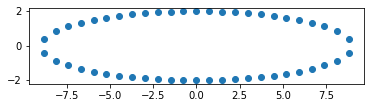

In [53]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [54]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

<pre>
<font face='georgia'>
<i>
1. As a part of this assignment you will be working the regression problem and how regularization helps to get rid of outliers

2. Use the above created X, Y for this experiment.

3. to do this task you can either implement your own SGDRegression(prefered) excatly similar to "SGD assignment" with mean sequared error or 
you can use the SGDRegression of sklearn, for example "SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)" 
note that you have to use the constant learning rate and learning rate <b>eta0</b> initialized.

4. as a part of this experiment you will train your linear regression on the data (X, Y) with different regularizations alpha=[0.0001, 1, 100] and 
observe how prediction hyper plan moves with respect to the outliers

5. This the results of one of the experiment we did (title of the plot was not metioned intentionally) 
<img src='https://i.imgur.com/FctjBiD.png'> 
in each iteration we were adding single outlier and observed the movement of the hyper plane.

6. please consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet 
is the input feature(X) and the second element is the output(Y)

7. for each regularizer, you need to add these outliers one at time to data and then train your model 
again on the updated data. 

8. you should plot a 3*5 grid of subplots,
 where each row corresponds to results of model with a single regularizer.

9. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points

10. MAKE SURE YOU WRITE THE DETAILED OBSERVATIONS, PLEASE CHECK THE LOSS FUNCTION IN THE SKLEARN DOCUMENTATION
 (please do search for it).
</i>
</font>
</pre>

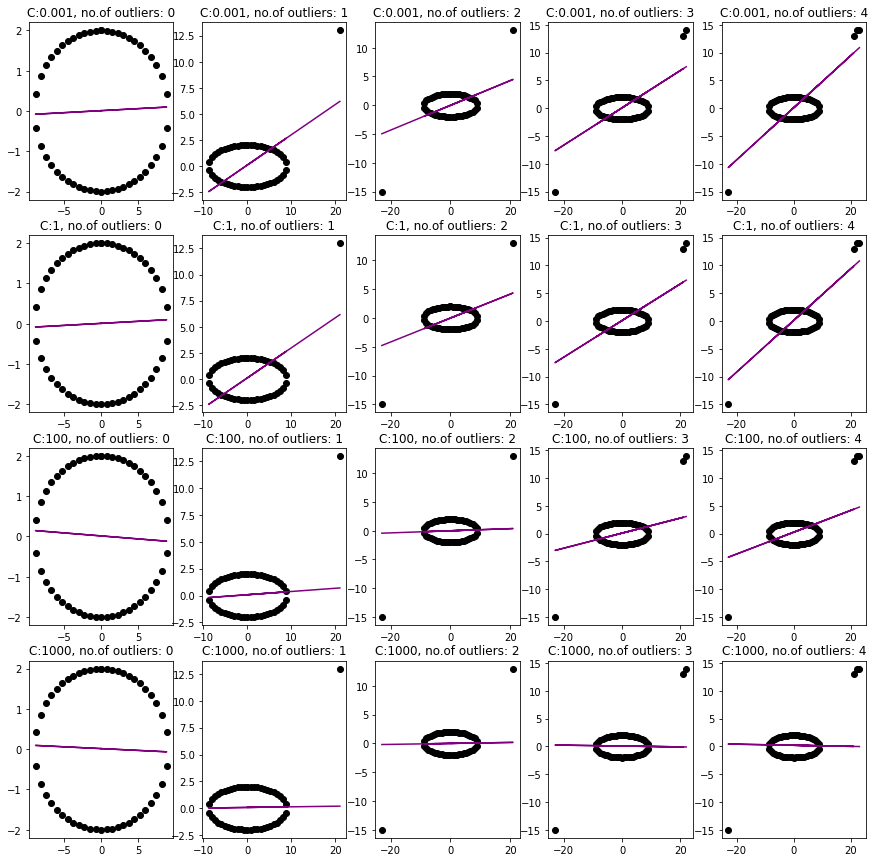

In [55]:
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]
c = [0.001,1,100,1000]
plt.figure(figsize = (15,15))
num=1
for c_value in c:
    X_new = X.copy()
    Y_new = Y.copy()
    number_of_outliers = 0
    for outlier in outliers:
        plt.subplot(4, 5, num) 
        num=num+1
        X_new = np.append(X_new, outlier[0])
        Y_new = np.append(Y_new,outlier[1])
        model = SGDRegressor(alpha=c_value, eta0=0.001, learning_rate='constant',random_state=42)
        X_new = np.reshape(X_new, (-1, 1))
        Y_new = np.reshape(Y_new, (-1, 1))
        model.fit(X_new,Y_new)
        plt.scatter(X_new,Y_new,c='black')
        plt.title(f'C:{c_value}, no.of outliers: {number_of_outliers}')
        number_of_outliers = number_of_outliers+1
        Y_pred = model.predict(X_new)
        plt.plot(np.ravel(X_new),Y_pred,color='purple')
        X_new.ravel()
        Y_new.ravel()

## observations

* since we are using squared_loss in SGDRegressor,we are performing simple Linear regression.

* Higher the value of alpha, higher is the regularization, which tells that we are giving more preference to regularizing the hyperplane than reducing the squared error.Lower of alpha indicates we are giving more preference to reduce the squared_error than regularizing the hyperplane

* At alpha = 0.001,we see that as number of outliers increases, the hyperplane is getting more and more accurate towards outliers points also.because we are keeping alpha very low, we are trying to reduce the squared_loss,hence to reduce the effect of loss due to outliers,The hyperplane is getting accurate for outliers too.eventually we are overfitting.

* At alpha = 1, again there is no much difference,hence we need to try various values of alpha.

* At alpha = 100, we see that, since we are caring for regularizing than reducing the  squared errors,we are eventaully giving less importance to outliers.seems like well fit to me.

* At alpha = 1000, we see that we have given atmost importance to regularization than reducing the squared_loss, hence we see that, the hyperplane is just underfitting.

# Task-D: Collinear features and their effect on linear models

## Doing perturbation test to check the presence of collinearity 

### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature



In [56]:
data = pd.read_csv('/content/drive/MyDrive/AAIC_datasets/linear_models/task_d.csv')
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [57]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

#### Finding the Correlation between the features	

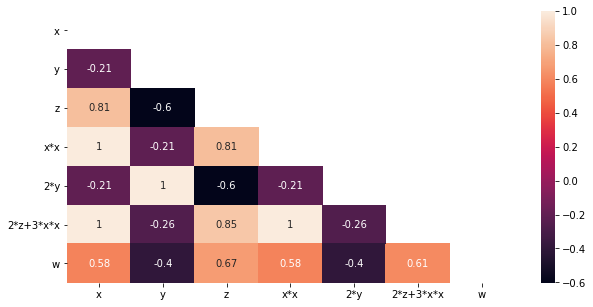

In [58]:
plt.figure(figsize = (10,5))
matrix = np.triu((data.drop(['target'], axis=1)).corr())
sns.heatmap((data.drop(['target'], axis=1)).corr(), annot=True, mask=matrix)
plt.show()

#### Observations

* we see that x,x*x,2*z+3*x*x are correlated to each other
* we see that y and 2*y are also correlated

#### Finding the best model for the given data

In [59]:
#hyperparameter Tuning
alphas = np.logspace(-2, 1, 100)
sgd = SGDClassifier(loss='log')
param_dict = dict(alpha=list(alphas),class_weight=['balanced',None])
rand = RandomizedSearchCV(sgd, param_dict, cv=10, scoring='accuracy', n_iter=20, random_state=10)
rand.fit(X, Y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal', loss='log',
                                           max_iter=1000, n_iter_no_change=5,
                                           n_jobs=None, penalty='l2',
                                           power_t=0.5, random_state=None,
                                           shuffle=True, tol=0.001,
                                           validation_fraction...
                                                  0.037649358067924674,
                                                  0.040370172585965536,
                                 

In [60]:
# Finding best parameters
rand.best_params_

{'alpha': 0.07564633275546291, 'class_weight': None}

In [61]:
# cooking the best model
best_model = SGDClassifier(loss='log',alpha=0.07564633275546291,random_state=42)

#### Getting the weights with the original data

In [62]:
# finding weights and acuuarcy without adding any noise
from sklearn.metrics import accuracy_score
best_model.fit(X,Y)
weights = list(best_model.coef_[0])
y_pred = best_model.predict(X)
best_model_accuracy = accuracy_score(Y,y_pred) * 100
print("The weights are :")
print(weights)
print(f"Accuracy - {best_model_accuracy}%")


The weights are :
[0.44784366279262944, -0.5647839762968656, 0.872562647673248, 0.4262568408651128, -0.5647839762968656, 0.4889814838553261, 0.36950371533178994]
Accuracy - 100.0%


#### Modifying the original data

In [63]:
# adding noise and finding weights and accuracy
noise = np.random.uniform(low = 0.01, high = 0.09, size=X.shape)
X_new = X + noise
best_model.fit(X_new,Y)
new_weights = list(best_model.coef_[0])
y_pred = best_model.predict(X_new)
best_model_accuracy_edited = accuracy_score(Y,y_pred) * 100
print("The weights after adding noise are :")
print(new_weights)
print(f"Accuracy - {best_model_accuracy_edited}%")

The weights after adding noise are :
[0.4469885895397168, -0.563735775787588, 0.8677323720142068, 0.43146546836806, -0.5708255519694528, 0.4936196470073801, 0.3677287031339155]
Accuracy - 100.0%


* The Accuracy metric is giving 100% for both the cases,Hence I feel that the noise is very insignificant noise as we are adding noise of order 10^-2.

* but yet there are small deviations in the weights

#### Checking deviations in weights

In [64]:
feature_names = list((data.drop(['target'], axis=1).columns))
weights_difference = [np.abs(weights[i] - new_weights[i]) for i in range(len(weights))]
feature_weights_difference = [(feature_names[i], weights_difference[i]) for i in range(len(feature_names))]
feature_weights_difference.sort(key = lambda x: x[1], reverse=True)
print("Top 4 fetures with high change in weights are:")
for i in feature_weights_difference:
    print(i[0],':',i[1])

Top 4 fetures with high change in weights are:
2*y : 0.006041575672587229
x*x : 0.005208627502947205
z : 0.00483027565904115
2*z+3*x*x : 0.004638163152054009
w : 0.0017750121978744593
y : 0.0010482005092775637
x : 0.0008550732529126193


#### Observations

* The  weights of features which are  not linear functions of other features are seen to be changed significantly.

* Again, The noise is very insignificant I feel.


### Task:2 SVM

#### Finding the best model for the given data

In [65]:
# Hyperparameter Tuning
alphas = np.logspace(-2, 1, 100)
sgd = SGDClassifier(loss='hinge')
param_dict = dict(alpha=list(alphas),class_weight=['balanced',None])
rand = RandomizedSearchCV(sgd, param_dict, cv=10, scoring='accuracy', n_iter=20, random_state=11)
rand.fit(X, Y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fracti...
                                                  0.037649358067924674,
                                                  0.040370172585965536,
                                 

In [66]:
# finding the best hypermeters
rand.best_params_

{'alpha': 0.030538555088334154, 'class_weight': None}

In [67]:
# cooking the best model
best_model = SGDClassifier(loss='hinge',alpha=0.030538555088334154,random_state=42)

#### Getting the weights with the original data

In [68]:
# finding weights and acuuarcy without adding any noise
from sklearn.metrics import accuracy_score
best_model.fit(X,Y)
weights = list(best_model.coef_[0])
y_pred = best_model.predict(X)
best_model_accuracy = accuracy_score(Y,y_pred) * 100
print("The weights are :")
print(weights)
print(f"Accuracy - {best_model_accuracy}%")

The weights are :
[0.29742412476027896, -0.40627824298248466, 0.8292485257566502, 0.2607681439279152, -0.40627824298248466, 0.3348107170357679, 0.204046063530766]
Accuracy - 100.0%


#### Modifying the original Data

In [69]:
# adding noise and finding weights and accuracy
noise = np.random.uniform(low = 0.01, high = 0.09, size=X.shape)
X_new = X + noise
best_model.fit(X_new,Y)
new_weights = list(best_model.coef_[0])
y_pred = best_model.predict(X_new)
best_model_accuracy_edited = accuracy_score(Y,y_pred) * 100
print("The weights after adding noise are :")
print(new_weights)
print(f"Accuracy - {best_model_accuracy_edited}%")

The weights after adding noise are :
[0.30436580697354915, -0.4341205969220328, 0.8264903962075036, 0.23827137075852817, -0.42995424601523746, 0.3457745575740923, 0.21259181354516335]
Accuracy - 100.0%


#### Checking deviations in weights

In [70]:
feature_names = list((data.drop(['target'], axis=1).columns))
weights_difference = [np.abs(weights[i] - new_weights[i]) for i in range(len(weights))]
feature_weights_difference = [(feature_names[i], weights_difference[i]) for i in range(len(feature_names))]
feature_weights_difference.sort(key = lambda x: x[1], reverse=True)
print("Top 4 fetures with high change in weights are:")
for i in feature_weights_difference:
    print(i[0],':',i[1])

Top 4 fetures with high change in weights are:
y : 0.027842353939548148
2*y : 0.0236760030327528
x*x : 0.02249677316938703
2*z+3*x*x : 0.010963840538324388
w : 0.008545750014397363
x : 0.006941682213270184
z : 0.0027581295491465596


#### Observations

* The above results tells that  the weights of features which are not linear functions of other features are changing a lot.

* Though there is very less deviation in the weights, these deviations become more signficant as significant noise is needed

# TASK E: Implementing Decision Function For RBF Kernel

In [71]:
# cooking our dataset
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [72]:
#  train test splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)

X_train,X_cv,y_train,y_cv = train_test_split(X_train, y_train, train_size=0.75,random_state=42)

In [73]:
# fitiing the SVC
clf = SVC(C=100,gamma = 0.001)
clf.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
# obtaining all the attributes for calculating the decision_values on X_cv
svs = clf.support_vectors_
cv_data = X_cv.copy()
gamma =0.001
dual_coefs = clf.dual_coef_[0]
intercept = clf.intercept_[0]

## Function Definition

In [75]:
def decision_function(cv_data,svs,gamma,dual_coefs,intercept):
    results = list()
    for point in X_cv:
        decision_value = np.dot(dual_coefs.T,np.exp(-gamma * ((svs-point)**2).sum(axis=1))) + intercept
        results.append(decision_value)
    return np.array(results)

In [76]:
# calculating the decision_values
decision_array = decision_function(cv_data,svs,gamma,dual_coefs,intercept)

In [77]:
# comparision of the decision_values with inbuilt decision_function
print("Comparing the  first five results with inbuilt decision_function")
print("custom decision_function",decision_array[:5])
print("Builtin decision_function",clf.decision_function(X_cv)[:5])

Comparing the  first five results with inbuilt decision_function
custom decision_function [ 0.87725032 -1.11743611 -3.55849268 -0.63350034 -1.18015501]
Builtin decision_function [ 0.87725032 -1.11743611 -3.55849268 -0.63350034 -1.18015501]


## Observations

* we obtained our decision_values which are exactly equal to decision_values of the sklearn

# Task F: Implementing Platt Scaling to find P(Y==1|X)

In [78]:
# input feature for platt's regression problem
f_cv = decision_array.copy()

In [79]:
# adjusting y+ and y- values to support for platt's scaling, taking positive_counts and negative_counts from y_train
positive_counts = np.count_nonzero(y_train)
negative_counts = y_train.shape[0] - positive_counts
y_positive = (positive_counts+1)/(positive_counts+2)
y_negative = 1/(negative_counts+2)
y_new_cv = y_cv.copy()
y_new_cv=np.where(y_new_cv==1,y_positive,y_new_cv)
y_new_cv=np.where(y_new_cv==0,y_negative,y_new_cv)


<font color='blue'>Initialize weights </font>

In [80]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(dim)
    b=0

    return w,b

<font color='blue'>Compute sigmoid </font>

In [81]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    tapered_value = 1/(1+np.exp(-z))

    return tapered_value

<font color='blue'> Compute loss </font>

In [82]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    n = len(y_true)
    sum = 0
    for y , y_hat in zip(y_true, y_pred):
        sum += (y * np.log10(y_hat)) + ((1-y) * np.log10(1-y_hat))
    # calculate log loss for the series
    loss = (-1/n) * sum


    return loss

In [83]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = (x * (y - sigmoid(np.dot(w.T,x) + b))) - ((alpha/N) * w)

    return dw

In [84]:
 def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db = y -  sigmoid(np.dot(w.T,x) + b)
     return db

In [85]:
def train(X_train,y_train,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    w,b = initialize_weights(X_train[0])
    # for every epoch
    train_loss = list()
    for i in range(epochs):
        # for every data point(X_train,y_train)
        for x, y in zip(X_train, y_train):
           #compute gradient w.r.to w (call the gradient_dw() function)
           dw = gradient_dw(x, y, w, b, alpha, len(X_train))
           #compute gradient w.r.to b (call the gradient_db() function)
           db = gradient_db(x,y,w,b)
           #update w, b
           w = w + (eta0 * dw)
           b = b + (eta0 * db)
        # predict the output of x_train[for all data points in X_train] using w,b
        y_train_pred = np.array([sigmoid((np.dot(w, x)) + b) for x in X_train])
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        train_loss.append(logloss(y_train, y_train_pred))

    return w,b,train_loss

In [86]:
# finding the best w and b
alpha=0.0001
eta0=0.0001
N=len(f_cv)
epochs=1000
w,b,train_loss=train(f_cv,y_new_cv,epochs,alpha,eta0)

In [87]:
print(f"The weight and intercept are {w} and {b} respectively")

The weight and intercept are 1.9431113181140058 and -0.0929349323062051 respectively


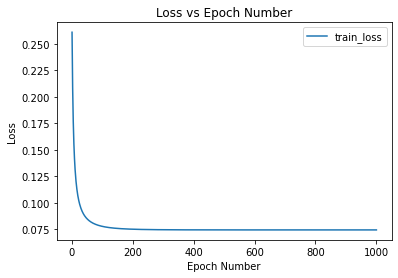

In [88]:
# check the loss is converging or not
import matplotlib.pyplot as plt
epoch = list(range(epochs+1))
epoch = epoch[1:]
len(train_loss)

plt.plot(epoch, list(train_loss), label = "train_loss")
plt.legend()
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.title("Loss vs Epoch Number")
plt.show()

In [89]:
# finding the decision_values on x_test
x_test_decision_values = decision_function(X_test,svs,gamma,dual_coefs,intercept)

In [90]:
# calcualting p(y=1|X) using platt's calibration
probability_score = list()
for decision_value in x_test_decision_values:
    prob = 1/(1+np.exp(-(w*decision_value)+b))
    probability_score.append(prob)
probability_score = np.array(probability_score)

In [92]:
#printing  P(y==1|X)
print(probability_score)

[8.57847993e-01 1.11217202e-01 1.08877525e-03 2.42682835e-01
 9.97291519e-02 8.62848442e-02 1.74535265e-03 9.97969103e-03
 1.01638601e-02 6.68224624e-02 9.89608944e-01 2.07631248e-03
 2.55720926e-02 6.73945589e-01 1.10667407e-01 8.67408154e-01
 1.14629433e-03 1.58462757e-01 9.79434361e-01 4.16944950e-02
 3.86615246e-03 1.55766638e-01 4.40482382e-04 3.23383655e-02
 1.57992844e-03 4.12492138e-01 9.62276312e-01 8.99870508e-01
 3.54565724e-04 2.27049785e-02 4.14400326e-03 1.24224813e-03
 1.04076198e-02 8.89757543e-04 1.54677336e-03 9.83792946e-01
 2.55003486e-01 4.55936245e-01 9.92471297e-01 2.31344823e-01
 5.03866020e-03 2.10414698e-03 1.38173504e-01 1.76124941e-01
 9.81558238e-01 9.10376891e-01 5.58258330e-03 9.71746236e-01
 1.39657309e-03 1.48992356e-01 4.27479181e-03 8.65898509e-02
 2.55377636e-03 7.72323019e-01 7.64534786e-04 1.38875272e-01
 1.74660628e-01 5.54910774e-04 9.43837454e-01 9.98986377e-01
 9.61513185e-01 3.38355241e-02 9.56041883e-01 7.83962242e-03
 1.06118612e-02 1.807389